In [ ]:
import numpy as np
import pandas as pd
import sklearn
import graphviz
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import datasets
from matplotlib import pyplot as plt
from imageio import imread
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Exercise 6.1

In [ ]:
files = files.upload()

Saving train.csv to train (1).csv


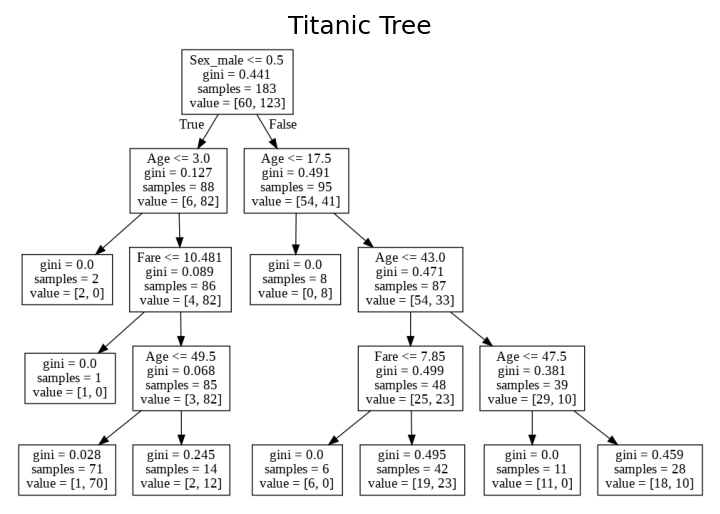

Best Parmaters:
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 1}
0.7749287749287749


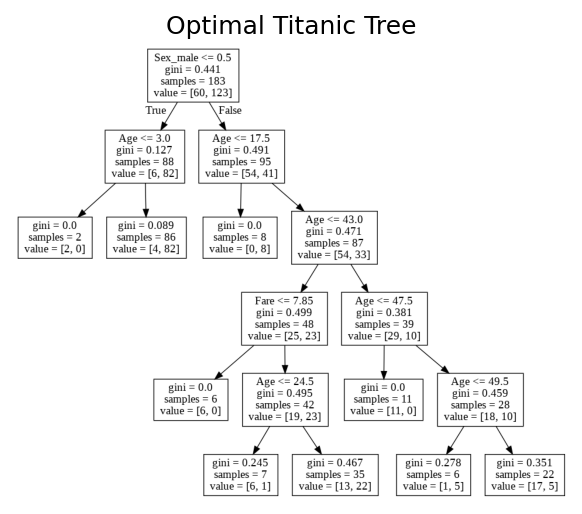

In [ ]:
def prob6_1():
    #read in data
    X = pd.read_csv('train.csv')
    #drop na
    X.dropna(inplace=True)
    #get label
    y = X['Survived']
    #drop columns that aren't filled or will affect the classifier
    X = X.drop(['Cabin', 'Name', 'PassengerId', 'Survived', 'Ticket'], axis=1)
    #one-hot-encode
    X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
    #create the classifier
    DTC = DecisionTreeClassifier(max_depth=4)
    #fit
    tree = DTC.fit(X, y)
    #get the tree and show it
    #part 1
    dot_data = export_graphviz(tree,feature_names=X.columns)
    graph = graphviz.Source(dot_data, format='png')
    graph.render('decision_tree_graphivz')
    graph = imread('decision_tree_graphivz.png')
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.set_title('Titanic Tree')
    ax.imshow(graph)
    ax.axis('off')
    plt.show()

    #part 2
    #get optimal parameters
    DTC = DecisionTreeClassifier()
    params = {'max_depth' : [i for i in range(10)], 
              'min_samples_leaf' : [i for i in range(10)], 
              'max_leaf_nodes' : [i for i in range(10)]}
    #run grid search with 7 fold cross validation
    GS = GridSearchCV(DTC, param_grid=params, n_jobs=-1, cv=7)
    GS.fit(X, y)
    params = GS.best_params_
    score = GS.best_score_
    print('Best Parmaters:')
    print(params, score, sep='\n')
    #build optimal tree
    DTC = DecisionTreeClassifier(max_depth=params['max_depth'], 
                                 min_samples_leaf = params['min_samples_leaf'], 
                                 max_leaf_nodes = params['max_leaf_nodes'] )

    tree = DTC.fit(X, y)
    #get the tree and show it
    #part 1
    dot_data = export_graphviz(tree,feature_names=X.columns)
    graph = graphviz.Source(dot_data, format='png')
    graph.render('optimal_decision_tree')
    graph = imread('optimal_decision_tree.png')
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.set_title('Optimal Titanic Tree')
    ax.imshow(graph)
    ax.axis('off')
    plt.show()
prob6_1()

# Exercise 6.2

Best Parmaters and Cross Validation Score:
{'max_depth': 11, 'max_leaf_nodes': 148, 'min_samples_leaf': 1}
0.8615321331784745
Accuracy:
0.825
Model Guessed: 8
Correct Label: 2


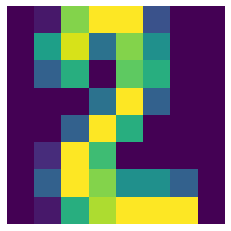

Model Guessed: 7
Correct Label: 4


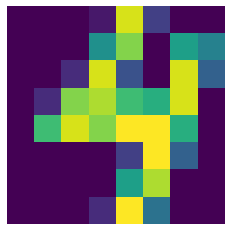

Model Guessed: 5
Correct Label: 3


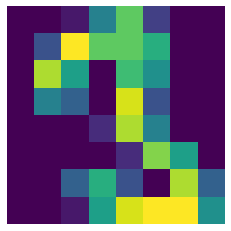

Model Guessed: 8
Correct Label: 3


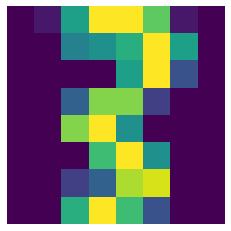

Model Guessed: 0
Correct Label: 9


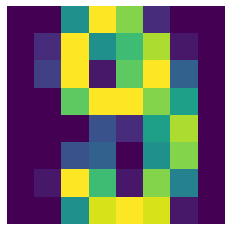

Model Guessed: 5
Correct Label: 8


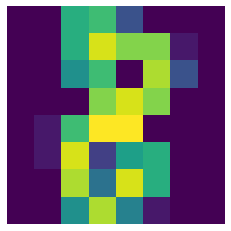

Model Guessed: 6
Correct Label: 9


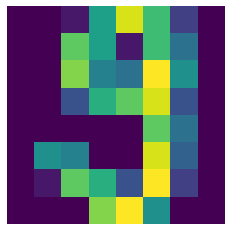

Model Guessed: 0
Correct Label: 9


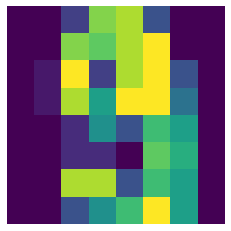

Model Guessed: 9
Correct Label: 3


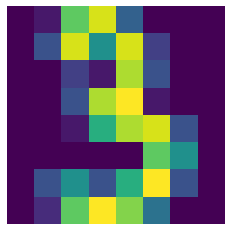

Model Guessed: 5
Correct Label: 8


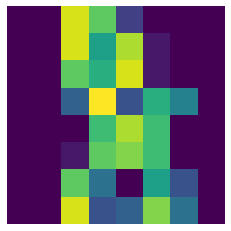

In [ ]:
#prob 6.2
def prob6_2():
    #part 1
    digits = datasets.load_digits()
    images = digits.images
    labels = digits.target
    X_train, X_test, y_train, y_test = train_test_split(images, labels, train_size = 0.8)
    X_train = [X.ravel() for X in X_train]
    X_test = [X.ravel() for X in X_test]

    #part 2
    DTC = DecisionTreeClassifier()
    #part 3
    params = {'max_depth' : [i for i in range(3, 13)], 
              'min_samples_leaf' : [i for i in range(1, 5)], 
              'max_leaf_nodes' : [i for i in range(100, 150)]}
    #run grid search with 5 fold cross validation
    GS = GridSearchCV(DTC, param_grid=params, n_jobs=-1, cv=5)
    GS.fit(X_train, y_train)
    params = GS.best_params_
    score = GS.best_score_
    print('Best Parmaters and Cross Validation Score:')
    print(params, score, sep='\n')
    #build optimal tree
    DTC = DecisionTreeClassifier(max_depth=params['max_depth'], 
                                 min_samples_leaf = params['min_samples_leaf'], 
                                 max_leaf_nodes = params['max_leaf_nodes'])

    DTC.fit(X_train, y_train)
    best_score = DTC.score(X_test, y_test)
    print('Accuracy:', best_score, sep='\n')

    guesses = DTC.predict(X_test)

    num_incorrect = 0
    for i, guess in enumerate(guesses):
        correct = y_test[i]
        if guess != correct:
            num_incorrect += 1
            print('Model Guessed:',  guess)
            print('Correct Label:', correct)
            plt.imshow(X_test[i].reshape((8, 8)))
            plt.axis('off')
            plt.show()
        elif num_incorrect == 10:
            break

    return 

prob6_2()

# Exercise 6.3

Best Parmaters and Cross Validation Score:
{'max_depth': 5, 'max_leaf_nodes': 112, 'min_samples_leaf': 4}
0.5284134088528967


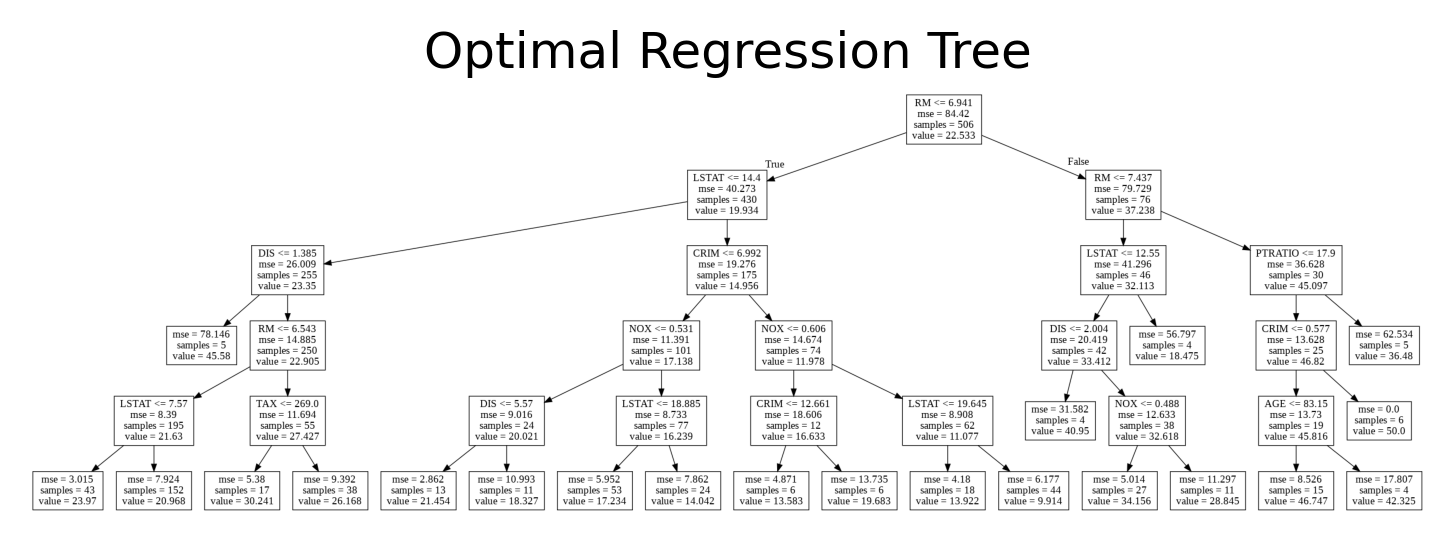

In [29]:
def prob6_3():
    X = datasets.load_boston().data 
    y = datasets.load_boston().target 
    features = datasets.load_boston().feature_names 
    DTR = DecisionTreeRegressor()
    params = {'max_depth' : [i for i in range(3, 13)], 
              'min_samples_leaf' : [i for i in range(1, 5)], 
              'max_leaf_nodes' : [i for i in range(100, 150)]}
    #run grid search with 5 fold cross validation
    GS = GridSearchCV(DTR, param_grid=params, n_jobs=-1, cv=5)
    GS.fit(X, y)
    params = GS.best_params_
    score = GS.best_score_
    print('Best Parmaters and Cross Validation Score:')
    print(params, score, sep='\n')
    #build optimal tree
    DTR = DecisionTreeRegressor(max_depth=params['max_depth'], 
                                min_samples_leaf = params['min_samples_leaf'], 
                                max_leaf_nodes = params['max_leaf_nodes'])

    tree = DTR.fit(X, y)
    #get the tree and show it
    #part 1
    dot_data = export_graphviz(tree, feature_names=features)
    graph = graphviz.Source(dot_data, format='png')
    graph.render('optimal_regression_tree')
    graph = imread('optimal_regression_tree.png')
    fig = plt.figure()
    fig.set_dpi(300)
    ax = fig.add_subplot(111)
    ax.set_title('Optimal Regression Tree')
    ax.imshow(graph)
    ax.axis('off')
    plt.show()

prob6_3()

# Exercise 6.4 & 6.5
It's two in the morning and I don't feel like doing these exercises. So I'll take the L. 